Slepá ulička, nic zajímavého.

In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
from src.tabulka import tabulka
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
df = vycisti(df, opravy)

2024/02/14 12:39:39 z 4573 řádků odstraněno 134. Aktuální dataframe má 4439 řádků.


In [2]:
df = df.explode("Lokace")

In [3]:
df["Lokace"] = df["Lokace"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [4]:
df = df.explode("Lokace")

In [5]:
def lokace_cista(x):
    try: 
        return x.split(" (")[0]
    except:
        return x

In [6]:
df["Lokace čistá"] = df["Lokace"].apply(lambda x: lokace_cista(x))

## Explorace

<Axes: xlabel='Copyright'>

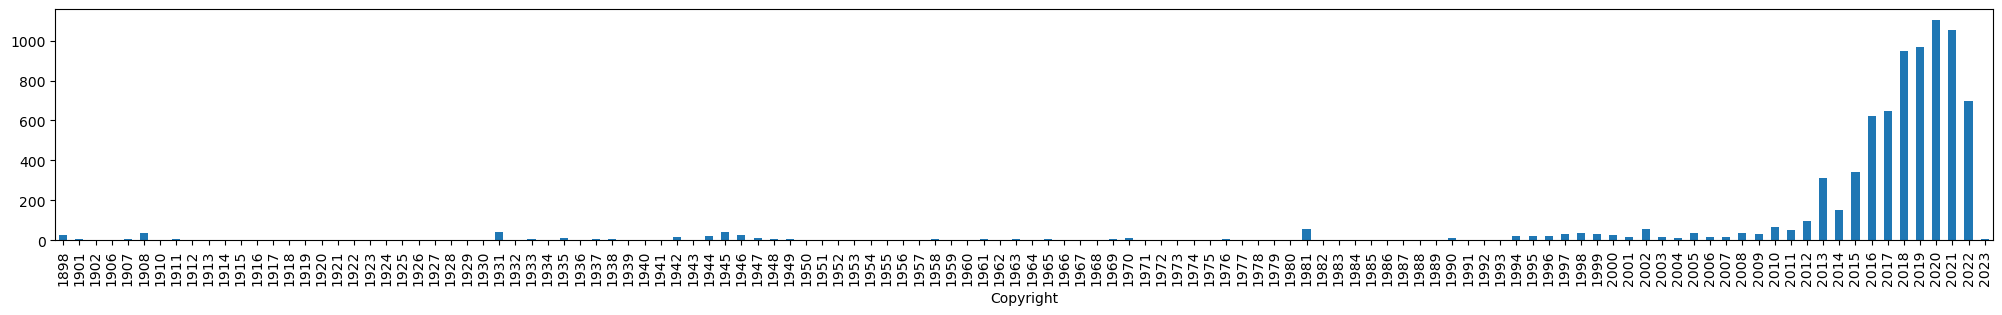

In [7]:
df.groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

<Axes: xlabel='Copyright'>

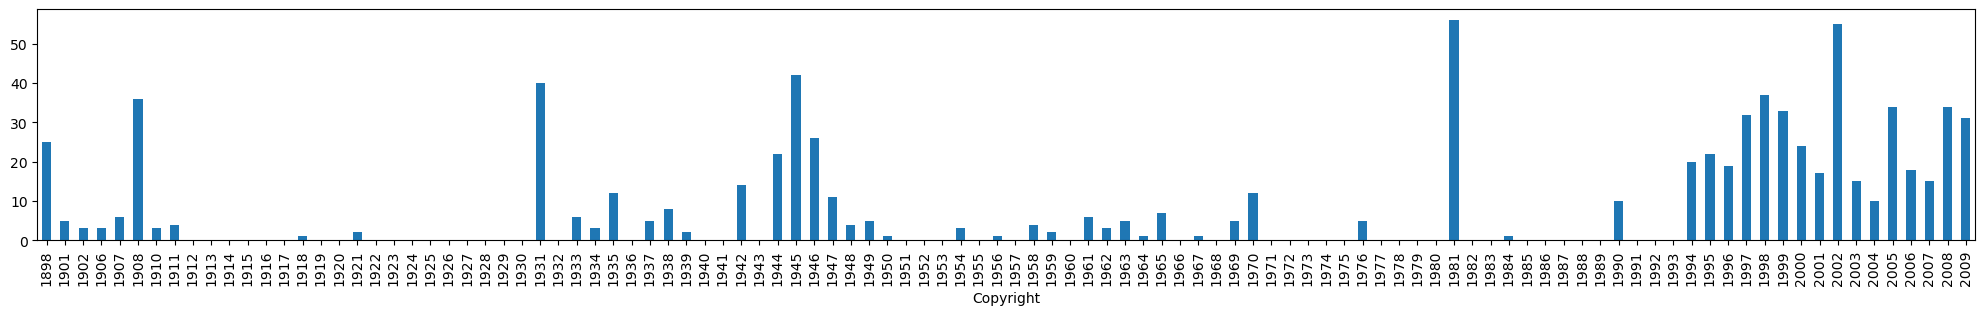

In [8]:
df[df["Copyright"] < 2010].groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

## Čištění

In [9]:
df.groupby("Lokace")["Film"].nunique().nlargest(300).index.to_list()

['Praha',
 'Česká republika',
 'Praha (Česká republika)',
 'Nové Město (Praha)',
 'Slovensko',
 'Staré Město (Praha)',
 'Vltava (Praha)',
 'Malá Strana (Praha)',
 'Hradčany (Praha)',
 'Vinohrady (Praha)',
 'Žižkov (Praha)',
 'Holešovice (Praha)',
 'Bubeneč (Praha)',
 'Dejvice (Praha)',
 'Smíchov (Praha)',
 'Bratislava (Slovensko)',
 'Francie',
 'Nusle (Praha)',
 'Karlín (Praha)',
 'Václavské náměstí (Nové Město)',
 'Staroměstské náměstí (Staré Město)',
 'Brno (Česká republika)',
 'Josefov (Praha)',
 'Německo',
 'Pražský hrad (Hradčany)',
 'Itálie',
 'Ruzyně (Praha)',
 'Letná (Praha)',
 'Národní třída (Nové Město)',
 'Polsko',
 'Rakousko',
 'Podolí (Praha)',
 'Vršovice (Praha)',
 'Karlův most (Vltava)',
 'Výstaviště (Bubeneč)',
 'Libeň (Praha)',
 'Spojené státy americké',
 'bez exteriérů',
 'náměstí Jana Palacha (Josefov)',
 'Kladno',
 'USA',
 'Velká Británie',
 'Bohnice (Praha)',
 'Krč (Praha)',
 'Malostranské náměstí (Malá Strana)',
 'Paříž (Francie)',
 'Vodičkova ulice (Nové Město)',

In [10]:
def mesto(lokace):
    
    if isinstance(lokace, str):
    
        if "(" in lokace:

            zavorka = lokace.split("(")[1].replace(")","").strip()

            if zavorka in seznamy["praha"]:

                mesto = "Praha"

            elif zavorka == "Česká republika":
                
                mesto = lokace.split("(")[0].strip()
            
            else:

                mesto = zavorka

        else:
            
            mesto = lokace
            
        if "Česká republika, " in mesto:
                
            mesto = mesto.split(",")[1].strip()
            
    else:

        mesto = lokace         
        
    return(mesto)

In [11]:
mesto("Celetná ulice (Staré Město)")

'Praha'

In [12]:
df["Město"] = df["Lokace"].apply(lambda x: mesto(x))

In [13]:
df["Město"]

0                Praha
0                Praha
0                Praha
1                Praha
1                Praha
             ...      
4572    Mladá Boleslav
4572    Mladá Boleslav
4572           Thajsko
4572           Thajsko
4572           Thajsko
Name: Město, Length: 13461, dtype: object

In [14]:
df[df["Lokace"].str.contains("Česká republika, ",na=True)]["Lokace"]

40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
       ... 
4533    NaN
4539    NaN
4542    NaN
4546    NaN
4547    NaN
Name: Lokace, Length: 3752, dtype: object

In [15]:
df[df["Lokace"] == "Praha"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Hudba k písni,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Lokace čistá,Město
0,Staroměstští hasiči (401702),Rakousko-Uhersko,1898,1898,premiéra 28. 8. 1898 (Výstava architektury a ...,1.0,[Jan Kříženecký (127419)],film,reportáž,"[dokumentární, distribuční]",Staroměstští hasiči,Staroměstští hasiči,Old Town Firemen,Výjezd parní stříkačky k ohni / Výjezd staromě...,None,None,None,None,None,None,None,None,[Jan Kříženecký (127419)],None,None,None,None,None,None,None,None,None,None,None,None,Praha,None,"[Jan Kříženecký (127419), Josef Pokorný (96687)]",None,[Národní filmový archiv (92324)],[Národní filmový archiv (92324)],krátkometrážní,"[35mm, DCP 2-D]",1.26,černobílý,němý,None,česká,bez dialogů,bez titulků,bez titulků,None,Hasičské vozy tažené koňmi vjíždějí ze dvora h...,None,None,None,None,None,None,None,None,None,17.0,bez titulků,Film byl natočen a promítán v pavilonu Český k...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Trip the steam syringe to the fire,None,None,None,None,None,None,None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,None,None,None,None,None,None,None,None,None,1898,1898,Praha,Praha
1,Smích a pláč (395110),Rakousko-Uhersko,1898,1898,premiéra 07/1898 (Výstava architektury a inže...,1.0,[Jan Kříženecký (127419)],film,anekdota,"[hraný, distribuční]",Smích a pláč,Smích a pláč,Laughter and Tears,Pláč a smích / Tvář Švába-Malostranského / Sól...,None,[Josef Šváb-Malostranský (55291)],[on sám],None,None,[Josef Šváb-Malostranský (55291)],None,None,[Jan Kříženecký (127419)],None,None,None,None,None,None,None,None,None,None,None,None,Praha,None,"[Jan Kříženecký (127419), Josef Pokorný (96687)]",None,[Národní filmový archiv (92324)],[Národní filmový archiv (92324)],krátkometrážní,"[35mm, DCP 2-D]","[1.33, 1.26]",černobílý,němý,None,česká,bez dialogů,bez titulků,bez titulků,None,"Švábova tvář, natočená v detailu, předvádí mim...",None,None,None,None,None,None,None,None,None,17.0,bez titulků,Film byl natočen a promítán v pavilonu Český k...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [16]:
", ".join(df.groupby("Město")["Film"].nunique().nlargest(1000).index.to_list())

'Praha, Česká republika, Slovensko, Brno, Francie, Německo, Polsko, Itálie, Rakousko, Bratislava, Spojené státy americké, Ústí nad Labem, Kladno, Ostrava, Plzeň, Zlín, bez exteriérů, Liberec, USA, Velká Británie, Šumava, Krkonoše, Mělník, Beroun, Hradec Králové, Jaroměř, Karlovy Vary, Mladá Boleslav, Olomouc, Slapy, Černošice, Jizerské hory, Ukrajina, Děčín, Litoměřice, Mostecko, New York, Paříž, Praha a okolí, Rusko, Španělsko, Brdy, Doksy, Jihlava, Kolín, Maďarsko, Mikulov, Most, Nizozemsko, Sušice, Výstaviště, České Budějovice, Švýcarsko, Brandýs nad Labem, Japonsko, Kalifornie, Kokořínsko, Kouřim, Kroměříž, Králův Dvůr, Milovice, Pardubice, Slaný, Troja, Veltrusy, Vltava, Český ráj, Čína, Bechyně, Dobříš, Hartmanice, Hluboká nad Vltavou, Holašovice, Jílové u Prahy, Karviná, Křivoklát, Lysá nad Labem, New York City, Norsko, Nymburk, Náchod, Poděbrady, Příbram, Stodůlky, Telč, Thajsko, Vinařice, Vysoké Tatry, zámek Jezeří, zámek Ploskovice, Český Krumlov, Řecko, Špindlerův Mlýn, Žate

## Tak co teď?

In [17]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]
hcf = hcf[hcf["Copyright"] >= 2013]

In [18]:
hcf["Film"].nunique()

295

In [19]:
hcf[hcf["Město"] == "Brno"]["Lokace čistá"].value_counts()

Lokace čistá
Brno                                               12
Výstaviště                                          4
Černá Pole                                          2
Pisárky                                             2
hlavní nádraží                                      2
ulice Koliště                                       2
Zelný trh                                           2
Dominikánské náměstí                                1
klub Melodka /interiér/                             1
hala Malá Amerika                                   1
Kopečná ulice                                       1
Sukova ulice                                        1
Běhounská ulice                                     1
Pisárecká ulice                                     1
Pekařská ulice                                      1
Jezuitská ulice                                     1
ulice Dornych                                       1
Eleven club /interiér/                              1
Malinovského ná

In [20]:
lokace = pd.DataFrame(hcf[~hcf["Město"].isin(["Slovensko","Česká republika","Bratislava","Rakousko","Francie","Itálie"])].groupby("Město")["Film"].nunique().nlargest(10))
lokace["Město"] = lokace.index
lokace["Počet filmů"] = lokace["Film"]
lokace["Nejčastější lokace"] = lokace["Město"].apply(lambda x: hcf[(hcf["Město"].str.contains(x, na=False) & (~hcf["Lokace čistá"].str.contains(x, na=False)))]["Lokace čistá"].value_counts().idxmax())
lokace = lokace.drop(columns=["Film"])
lokace

,Město,Počet filmů,Nejčastější lokace
Město,,,
Praha,Praha,175,Nové Město
Kladno,Kladno,13,Divadelní ulice
Brno,Brno,12,Výstaviště
Jaroměř,Jaroměř,10,Josefov
Mělník,Mělník,10,Olešno
Mladá Boleslav,Mladá Boleslav,9,Viničná ulice
Zlín,Zlín,9,Kudlov
Beroun,Beroun,8,lom Alkazar
Hradec Králové,Hradec Králové,8,Hradební ulice


In [21]:
tabulka(lokace, titulek="Nejčastější natáčecí lokace posledních 10 let", vysvetlivka="Srovnání zahrnuje celovečerní hrané filmy. Sloupec konkrétních lokací je jen orientační: co může být jednou označené jako Výstaviště, může být jindy uvedeno jako BVV či Pisárky.")

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejčastější natáčecí lokace posledních 10 let</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Město</th><th class="text-nowrap">Počet filmů</th><th class="text-nowrap">Nejčastější lokace</th></tr></thead><tbody class="text-sm"><tr><td>Praha</td><td>175</td><td>Nové Město</td></tr><tr><td>Kladno</td><td>13</td><td>Divadelní ulice</td></tr><tr><td>Brno</td><td>12</td><td>Výstaviště</td></tr><tr><td>Jaroměř</td><td>10</td><td>Josefov</td></tr><tr><td>Mělník</td><td>10</td><td>Olešno</td></tr><tr><td>Mladá Boleslav</td><td>9</td><td>Viničná ulice</td></tr><tr><td>Zlín</td><td>9</td><td>Kudlov</td></tr><tr><td>Beroun</td><td>8</td><td>lom Alkazar</td></tr><tr><td>Hradec Králové</td><td>8</td><td>Hradební ulice</td></tr><tr><td>Černošice</td><td>8</td><td>Ukrajinská ulice</td></tr></tbody><tfoot><tr style="text-align: center;"><td colspan="100%">Srovnání zahrnuje celo

In [22]:
hcf[hcf["Město"] == "Praha"].groupby("Lokace čistá")["Film"].nunique().nlargest(20)

Lokace čistá
Praha                167
Nové Město            51
Vltava                39
Žižkov                30
Vinohrady             29
Staré Město           27
Holešovice            24
Malá Strana           24
Hradčany              23
Bubeneč               19
Dejvice               19
Nusle                 19
Smíchov               19
Václavské náměstí     17
Karlín                16
Národní třída         12
Vršovice              12
Josefov               11
Podolí                11
Pražský hrad          11
Name: Film, dtype: int64

In [23]:
df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_19892\3879034159.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Česká republika                         203
Praha (Česká republika)                 141
Brno (Česká republika)                   24
Ostrava (Česká republika)                 8
Krkonoše (Česká republika)                6
Plzeň (Česká republika)                   6
Jaroměř (Česká republika)                 5
Jihlava (Česká republika)                 5
Jizerské hory (Česká republika)           5
Kolín (Česká republika)                   5
Olomouc (Česká republika)                 5
Slapy (Česká republika)                   5
Veltrusy (Česká republika)                5
Zlín (Česká republika)                    5
Ústí nad Labem (Česká republika)          5
Beroun (Česká republika)                  4
Brdy (Česká republika)                    4
Doksy (Česká republika)                   4
Děčín (Česká republika)                   4
Hradec Králové (Česká republika)          4
Mladá Boleslav (Česká republika)          4
Šumava (Česká republika)                  4
Broumov (Česká republika)

In [24]:
df[(df["Město"] != "Praha") & (df["Lokace"].str.lower().str.contains("ulice", na=False))].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Viničná ulice (Mladá Boleslav)                                          6
Denisova ulice (Olomouc)                                                3
Kamýcká ulice (Suchdol)                                                 3
Vančurova ulice (Kladno)                                                3
ulice (Olomouc)                                                         3
Divadelní ulice (Kladno)                                                2
Harrachova ulice (Špindlerův Mlýn)                                      2
Havlíčkova ulice (Kroměříž)                                             2
Hněvotínská ulice (Olomouc)                                             2
Hradební ulice (Hradec Králové)                                         2
Husova ulice (Slaný)                                                    2
Kounicova ulice (Brno)                                                  2
Kozia ulice (Bratislava)                                                2
Křížkovského ulice (Olomouc)   

In [25]:
df[df["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Vodičkova ulice (Nové Město)                    12
ulice (Praha)                                   11
Pernerova ulice (Karlín)                         9
Tusarova ulice (Holešovice)                      7
Bělohorská ulice (Břevnov)                       6
Lucerna (Vodičkova ulice)                        6
Pařížská ulice (Staré Město)                     6
Viničná ulice (Mladá Boleslav)                   6
Vinohradská ulice (Vinohrady)                    6
ulice Komunardů (Holešovice)                     6
Dejvická ulice (Dejvice)                         5
Hellichova ulice (Malá Strana)                   5
Jindřišská ulice (Nové Město)                    5
Koulova ulice (Dejvice)                          5
Nádražní ulice (Smíchov)                         5
Seifertova ulice (Žižkov)                        5
Sněmovní ulice (Malá Strana)                     5
Spálená ulice (Nové Město)                       5
ulice Na Pankráci (Nusle)                        5
Bartolomějská ulice (Sta

In [26]:
df[df["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
zámek Jezeří                                                        5
zámek Ploskovice                                                    5
zámek /skleníky/ (Veltrusy)                                         2
zámek Buchlovice                                                    2
zámek Dolní Beřkovice                                               2
zámek Krásný Dvůr                                                   2
zámek Lednice                                                       2
zámek Milotice                                                      2
zámek Veltrusy                                                      2
Egyptský pavilon (zámek Veltrusy)                                   1
Poděbrady /zámek/ (Česká republika)                                 1
Roztoky u Prahy – zámek                                             1
Topoľčanský hrad (Topoľčianky – zámek                               1
Topoľčianky – zámek                                                 1
Zbraslavský z

In [27]:
df[df["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Václavské náměstí (Nové Město)                                                26
Staroměstské náměstí (Staré Město)                                            25
náměstí Jana Palacha (Josefov)                                                15
Malostranské náměstí (Malá Strana)                                            12
Hradčanské náměstí (Hradčany)                                                 10
Národní muzeum (Václavské náměstí)                                             7
Václavské náměstí (Praha)                                                      7
náměstí Republiky (Staré Město)                                                7
Karlovo náměstí (Nové Město)                                                   6
náměstí Curieových (Staré Město)                                               6
Loretánské náměstí (Hradčany)                                                  5
Rudolfinum (náměstí Jana Palacha)                                              5
Staroměstská radnice 

## Merge s lvy

In [28]:
lvi = pd.read_json(os.path.join('data','ceske_lvy.json'))

In [30]:
nejfilmy = lvi[(lvi['Lev'] == 'vyhra') & (lvi['KategorieS'] == 'Nejlepší film')]['Film'].drop_duplicates().to_list()

In [34]:
nejfilmy

['Šakalí léta (7307)',
 'Musíme si pomáhat (15231)',
 'Horem Pádem (22888)',
 'Je třeba zabít Sekala (163291)',
 'Nuda v Brně (20268)',
 'Obsluhoval jsem anglického krále (43223)',
 'Díky za každé nové ráno (7866)',
 'Otesánek (401949)',
 'Kolja (9013)',
 'Tajnosti (52699)',
 'Návrat idiota (36916)',
 'Štěstí (17155)',
 'Šarlatán (402092)',
 'Knoflíkáři (9793)',
 'Rok ďábla (12836)',
 'Karamazovi (56434)',
 'Bába z ledu (401257)',
 'Hořící keř (398412)',
 'Masaryk (401331)',
 'Protektor (52494)',
 'Záhrada',
 'Cesta ven (400548)',
 'Il Boemo',
 'Poupata (116470)',
 'Nabarvené ptáče (401962)',
 'Zátopek',
 'Všechno bude (401774)',
 'Pouta (80516)',
 'Ve stínu (66076)',
 'Kobry a Užovky (400584)']

In [32]:
df[df['Film'].isin(nejfilmy)].groupby('Lokace čistá').size().nlargest()

Lokace čistá
Praha              10
Česká republika     5
Hartmanice          2
Holý vrch           2
Hradčany            2
dtype: int64

In [33]:
df[df['Film'].isin(nejfilmy)].groupby('Lokace').size().nlargest()

Lokace
Praha                      6
Česká republika            5
Praha (Česká republika)    4
Malá Strana (Praha)        2
Slovensko                  2
dtype: int64

In [38]:
df[df['Film'].isin(nejfilmy)].groupby('Město')['Film'].nunique().nlargest(10)

Město
Praha              10
Česká republika     5
Hartmanice          2
Jaroměř             2
Josefov             2
Ralsko              2
Slapy               2
Slovensko           2
Veltrusy            2
Velvary             2
Name: Film, dtype: int64

In [35]:
df.columns

Index(['Film', 'Země původu', 'Copyright', 'Rok výroby', 'Premiéra', 'Minutáž',
       'Režie', 'Kategorie', 'Žánr', 'Typologie',
       ...
       'Umělecké vedení', 'Zpěv role', 'Překlad české verze', 'Rychlost',
       'Přístupnost', 'cyklus', 'Začátek výroby', 'Konec výroby',
       'Lokace čistá', 'Město'],
      dtype='object', length=135)